# Setting up PySpark enviorement in Colab

In [ ]:
!pip install pyspark py4j

# Loading Fake Data CSV into Spark DataFrame

The loading Phase came from PySpark_HW1 because when I tried to use the `spark.read.csv()` from PySpark_HW3 it wasn't loading correctly. I had columns like: C_0 (_c0), C_1 (_c0) etc. Due to this, I decided to use the `spark.read.option('header', 'true')` to get the first rows as the DataFrame columns.

In [3]:
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder.appName('DataFrame').getOrCreate()

In [7]:
#df = spark.read.csv('Fake_data.csv') # HW3 csv reading option (not working)
#df.show(truncate = False)

df = spark.read.option('header', 'true').csv('Fake_data.csv')
df.show(n=5, truncate=False)

+---+----------------------+------------------------------+----------+------+-------------------------------------+---------+-------------+-----------+
|_c0|Birth_Country         |Email                         |First_Name|Income|Job                                  |Last_name|Loan_Approved|SSN        |
+---+----------------------+------------------------------+----------+------+-------------------------------------+---------+-------------+-----------+
|0  |Bosnia and Herzegovina|emily15@whitehead.com         |Melissa   |109957|Telecommunications researcher        |Miranda  |False        |129-41-7773|
|1  |Belgium               |ronald87@yahoo.com            |Curtis    |301884|Animal nutritionist                  |Garrett  |True         |212-74-3976|
|2  |United Kingdom        |hannah29@gmail.com            |Connor    |341584|English as a foreign language teacher|Steele   |False        |024-35-3834|
|3  |Kiribati              |derrick59@hotmail.com         |Adam      |448293|Surveyor, c

In [ ]:
df.printSchema() # This helps understanding the DF structure

root
 |-- _c0: string (nullable = true)
 |-- Birth_Country: string (nullable = true)
 |-- Email: string (nullable = true)
 |-- First_Name: string (nullable = true)
 |-- Income: string (nullable = true)
 |-- Job: string (nullable = true)
 |-- Last_name: string (nullable = true)
 |-- Loan_Approved: string (nullable = true)
 |-- SSN: string (nullable = true)



Transformations & Actions:

`Transformation`: Transformation refers to the operation applied on a RDD to create new RDD. Filter, groupBy and map are the examples of transformations.

`Actions`: Actions refer to an operation which also applies on RDD, that instructs Spark to perform computation and send the result back to driver.

I am going to be creating a temporary table named “Fake_data_temp” so I can practice with the Spark SQL API and use SQL Syntax. The idea behind this was to use a couple of things from last homework and to also practice some SQL syntax. It is important to mentioned that many a few syntax/notes (SQLite Syntax) were taken from “Applied Database Technologies” class with Professor Olga Scrivner. PySpark with SQL API HW4 uses common SQL Syntax to achieve results.

# Question 1
Find birth country which has highest amount of people.

In [8]:
def_temp = df.createOrReplaceTempView('Fake_data_temp')

In [9]:
# Checking if temporary table exists or not
table_exists = spark.catalog.tableExists('Fake_data_temp')

if table_exists:
    print('Fake_data_temp exists')
else:
    print('Fake_data_temp does not exist')

Fake_data_temp exists


SQLite Syntax example from Applied Database Technologies:
It doesn't matter if you decide to the write the syntax in caps lock or not.

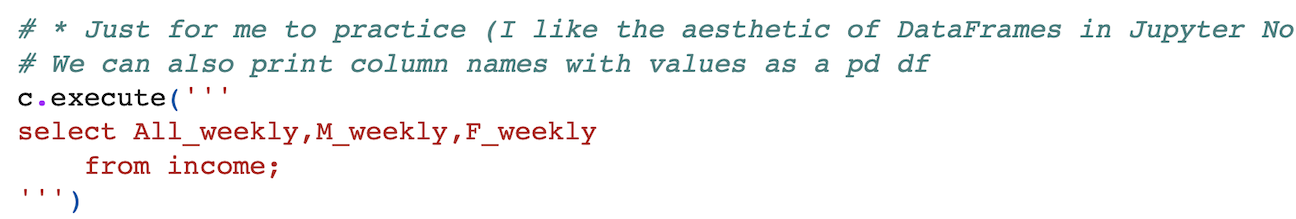

`query_1` shows the implementation of spark.sql and how do we select and count all records in Birth_Country, after that we assign the alias Total_Country to it.  Then we proceed to group be Birth_Country and order it by Total_Country in descending order. Limit 1 is used to get the first row of the sorted Total_Country DESC. It's also worth mentioning that the first() function will return the  first value of the selected column.

In [ ]:
query_1 = spark.sql('''
      SELECT Birth_Country, COUNT(*) AS Total_Country
      FROM Fake_data_temp
      GROUP BY Birth_Country
      ORDER By Total_Country DESC
      LIMIT 1;
''')

In [ ]:
query_1.show(truncate=False)

+-------------+-------------+
|Birth_Country|Total_Country|
+-------------+-------------+
|Korea        |91           |
+-------------+-------------+



In [ ]:
query1 = query_1.first()['Birth_Country'] # get the first value of the Birth_Country column from first row of query_1

print('Country with the highest amount of people is:', query1)

Country with the highest amount of people is: Korea


In [ ]:
query1_sql = query_1.first()[0]
print('Country with the highest amount of people is:', query1_sql)

Country with the highest amount of people is: Korea


## New Code Transformations and Actions

We are still using the temporary table -> Fake_data_temp

In [10]:
# Spark.sql -> also transformation
# new query
new_query1 = spark.sql('''
      SELECT Birth_Country, COUNT(*) AS Total_Country
      FROM Fake_data_temp
      GROUP BY Birth_Country;
''')

transf1 = new_query1.orderBy(new_query1.Total_Country.desc()) # transformation

results_q1 = transf1.collect() # action

top_country = results_q1[0] # action

print(top_country)

Row(Birth_Country='Korea', Total_Country=91)


In [12]:
new_query1 = spark.sql('''
      SELECT Birth_Country, COUNT(*) AS Total_Country
      FROM Fake_data_temp
      GROUP BY Birth_Country;
''')

# We can aslo have something like this (reference PySpark desc() and collect()):
transf_act1 = new_query1.orderBy(new_query1.Total_Country.desc()).collect() # transformation and action
top_country = transf_act1[0] # action

print(top_country)

Row(Birth_Country='Korea', Total_Country=91)


# Question 2

Find Maximum income in each country  and display the countries from highest to lowest Income.

The code `query_2` is straight forward, we select Birth_Country and Income from the DataFrame and assigned an alias to the MAX(Income) names Maximum_Income. We group by Birth_Country and order by Maximum_Income in descending order. We store the new DataFrame in a variable called maximum_income_df and show results from highest to lowest.

In [14]:
# transformation
query_2 = spark.sql('''
      SELECT Birth_Country, MAX(Income) AS Maximum_Income
      FROM Fake_data_temp
      GROUP BY Birth_Country
      ORDER BY Maximum_Income DESC;
''')

maximum_income_df = query_2 # storing query_2 dataframe into new variable

maximum_income_df.show(truncate=False)

+--------------------------------------------+--------------+
|Birth_Country                               |Maximum_Income|
+--------------------------------------------+--------------+
|Denmark                                     |99900         |
|Madagascar                                  |99895         |
|Cayman Islands                              |99731         |
|Chad                                        |99721         |
|Angola                                      |9961          |
|Falkland Islands (Malvinas)                 |9939          |
|Korea                                       |99374         |
|United States Minor Outlying Islands        |99334         |
|Uganda                                      |99315         |
|Brazil                                      |99311         |
|Antarctica (the territory South of 60 deg S)|99309         |
|Nepal                                       |99284         |
|Oman                                        |99283         |
|Romania

## New Code Transformations and Actions

We are still using the temporary table -> Fake_data_temp

In [15]:
max_income = query_2.withColumnRenamed('Maximum_Income', 'MAX_Income') # transformation lets renamed to MAX_Income

transf2 = max_income.orderBy(max_income.MAX_Income.desc()) # transformation

results_q2 = transf2.collect() # action

for row in results_q2:
    print(row)

Row(Birth_Country='Denmark', MAX_Income='99900')
Row(Birth_Country='Madagascar', MAX_Income='99895')
Row(Birth_Country='Cayman Islands', MAX_Income='99731')
Row(Birth_Country='Chad', MAX_Income='99721')
Row(Birth_Country='Angola', MAX_Income='9961')
Row(Birth_Country='Falkland Islands (Malvinas)', MAX_Income='9939')
Row(Birth_Country='Korea', MAX_Income='99374')
Row(Birth_Country='United States Minor Outlying Islands', MAX_Income='99334')
Row(Birth_Country='Uganda', MAX_Income='99315')
Row(Birth_Country='Brazil', MAX_Income='99311')
Row(Birth_Country='Antarctica (the territory South of 60 deg S)', MAX_Income='99309')
Row(Birth_Country='Nepal', MAX_Income='99284')
Row(Birth_Country='Oman', MAX_Income='99283')
Row(Birth_Country='Romania', MAX_Income='99260')
Row(Birth_Country='Holy See (Vatican City State)', MAX_Income='99259')
Row(Birth_Country='Guernsey', MAX_Income='99212')
Row(Birth_Country='Haiti', MAX_Income='99209')
Row(Birth_Country='Bermuda', MAX_Income='99183')
Row(Birth_Countr

# Question 3

How many people has income over 100,000 but their loan is approved.


`query_3` follows kind of the same approach as query_1, but in much simpler way. We select the count of the records satisfied by the “where” clause and assign it to alias People. The “and” clause is the expand the task and find the Income greater than 100000 and Loan_Approved equals to True to get the result. Just like query_1, first() function is implemented to get the first value of the column People.

In [17]:
# transformation
query_3 = spark.sql('''
      SELECT COUNT(*) AS People
      FROM Fake_data_temp
      WHERE Income > 100000
      AND Loan_Approved = 'True';
''')

In [ ]:
query_3.show(truncate=False)

+------+
|People|
+------+
|3958  |
+------+



In [ ]:
query3 = query_3.first()['People'] # get the first value of the People column from first row of query_3

print('How many people has income over 100,000 but their loan is approved?', query3, 'people.')

How many people has income over 100,000 but their loan is approved? 3958 people.


In [ ]:
query3_sql = query_3.first()[0]

print('How many people has income over 100,000 but their loan is approved?', query3_sql, 'people.')

How many people has income over 100,000 but their loan is approved? 3958 people.


## New Code Transformations and Actions

We are still using the temporary table -> Fake_data_temp

In [30]:
transf3 = query_3.withColumnRenamed('People', 'People_Income_over_100k_Loan_Approved') # transformation

results_q3 = transf3.collect() # action

people_count = results_q3[0]

print(people_count)

Row(People_Income_over_100k_Loan_Approved=3958)


# Question 4

Find top 10 people with highest income in United States of America. (Print their names, income and jobs from the highest income to lowest).

`query4` takes on the name (incluing Last_Name), Income, and Job from the temporary table Fake_data_temp to get the top 10 people with highest income in the USA. To achieve this we need to use the “where” clause to set the Birth_Country to ‘United States of America’ and order by income in descending order. Limit to 10 because we just want the top 10 people.

In [ ]:
query_4 = spark.sql('''
      SELECT First_Name, Last_Name, Income, Job
      FROM Fake_data_temp
      WHERE Birth_Country = 'United States of America'
      ORDER BY Income DESC
      LIMIT 10;
''')

query4 = query_4 # storing query_4 dataframe into new variable

query4.show(truncate=False)

+-----------+---------+------+-------------------------------------------+
|First_Name |Last_Name|Income|Job                                        |
+-----------+---------+------+-------------------------------------------+
|Bobby      |Lopez    |7477  |Dietitian                                  |
|John       |Patterson|74237 |Facilities manager                         |
|Arthur     |Thompson |74114 |Electronics engineer                       |
|Christopher|Gonzales |71967 |Midwife                                    |
|Dorothy    |Hart     |68837 |Magazine features editor                   |
|Alejandro  |Hernandez|66730 |Warden/ranger                              |
|Martha     |Vargas   |62632 |Illustrator                                |
|Alyssa     |Miller   |482588|Amenity horticulturist                     |
|Tiffany    |Meyer    |47759 |Solicitor, Scotland                        |
|Hunter     |Walls    |468946|Psychologist, prison and probation services|
+-----------+---------+--

## New Code Transformations and Actions

We are still using the temporary table -> Fake_data_temp

In [33]:
# new query
new_query4 = spark.sql('''
      SELECT First_Name, Last_Name, Income, Job
      FROM Fake_data_temp
      WHERE Birth_Country = 'United States of America';
''')

transf4 = new_query4.orderBy(new_query4.Income.desc()) # transformation

results_q4 = transf4.collect() # action

top10 = results_q4[:10] # limit 10

for person in top10:
    print(person)

Row(First_Name='Bobby', Last_Name='Lopez', Income='7477', Job='Dietitian')
Row(First_Name='John', Last_Name='Patterson', Income='74237', Job='Facilities manager')
Row(First_Name='Arthur', Last_Name='Thompson', Income='74114', Job='Electronics engineer')
Row(First_Name='Christopher', Last_Name='Gonzales', Income='71967', Job='Midwife')
Row(First_Name='Dorothy', Last_Name='Hart', Income='68837', Job='Magazine features editor')
Row(First_Name='Alejandro', Last_Name='Hernandez', Income='66730', Job='Warden/ranger')
Row(First_Name='Martha', Last_Name='Vargas', Income='62632', Job='Illustrator')
Row(First_Name='Alyssa', Last_Name='Miller', Income='482588', Job='Amenity horticulturist')
Row(First_Name='Tiffany', Last_Name='Meyer', Income='47759', Job='Solicitor, Scotland')
Row(First_Name='Hunter', Last_Name='Walls', Income='468946', Job='Psychologist, prison and probation services')


# Question 5


How many numbers of distinct jobs are there? Again, `query5` follows the basic SQL Syntax to calculate the number of distinct jobs out there. We select and count the distinct Job and assing an alias to it named "Distnict_Job". Then we call the first value of this selected column to get the result.


In [60]:
query_5 = spark.sql('''
      SELECT COUNT(DISTINCT Job) AS Distinct_Job
      FROM Fake_data_temp;
''')

In [ ]:
query_5.show(truncate=False)

+------------+
|Distinct_Job|
+------------+
|639         |
+------------+



In [ ]:
query5 = query_5.first()['Distinct_Job'] # get the first value of the Distinct_Job column from first row of query_5

print('How many number of distinct jobs are there?', query5,'jobs.')

How many number of distinct jobs are there? 639 jobs.


In [ ]:
query5_sql = query_5.first()[0]

print('How many number of distinct jobs are there?', query5_sql,'jobs.')

How many number of distinct jobs are there? 639 jobs.


## New Code Transformations and Actions

We are still using the temporary table -> Fake_data_temp

In [31]:
# new query
new_query5 = spark.sql('''
      SELECT Job
      FROM Fake_data_temp;
''')

transf5 = new_query5.distinct() # transformation

results_q5 = transf5.count() # action

print('How many number of distinct jobs are there?', results_q5, 'jobs.')

How many number of distinct jobs are there? 639 jobs.


# Question 6
How many writers earn less than 100,000? `query6` calculates the total count of the rows where Job == 'Writer' and Income is less than $100,000. Again, we use the first() function to obtain the first value fo the selected column -> Writer.

In [ ]:
query_6 = spark.sql('''
      SELECT COUNT(*) AS Writers
      FROM Fake_data_temp
      WHERE Job = 'Writer'
      AND Income < 100000;
''')

In [ ]:
query_6.show(truncate=False)

+-------+
|Writers|
+-------+
|5      |
+-------+



In [ ]:
query6 = query_6.first()['Writers'] # get the first value (count of writers) of the Writers column from first row of query_6
print('How many writers earn less than 100,000?', query6)

How many writers earn less than 100,000? 5


In [ ]:
query6_sql = query_6.first()[0]
print('How many writers earn less than 100,000?', query6_sql)

How many writers earn less than 100,000? 5


## New Code Transformations and Actions

We are still using the temporary table -> Fake_data_temp

In [32]:
# new query
new_query6 = spark.sql('''
      SELECT *
      FROM Fake_data_temp
      WHERE Job = 'Writer';
''')

transf6 = new_query6.filter(new_query6.Income < 100000) # transformation

results_q6 = transf6.count() # action

print('How many writers earn less than 100,000?', results_q6, 'writers.')

How many writers earn less than 100,000? 5 writers.


# Question 7
List the Top 5 countries with the count which have the highest persons with their first name "Stephen" or "Alexandra" and whose salary is greater then 200000.

This code it’s a more elaborated than the others, however it still uses the basics of SQL Syntax to achieve results. `query_7` code calculates the total count of persons in each country who satisfied the filtering results. We assign these results to the column Highest_Person_Count using alias. We also use the WHERE, OR, AND to filter results. Finally, we group by Birth_Country and we order in descending order the Highest_Person_Count. We limit to 5 since we only want the top 5 countries results.

Observation: Alexandra not Alezander

In [12]:
query_7 = spark.sql('''
      SELECT Birth_Country, COUNT(*) AS Highest_Person_Count
      FROM Fake_data_temp
      WHERE First_Name = 'Stephen'
      OR First_Name = 'Alexandra'
      AND Income > 200000
      GROUP BY Birth_Country
      ORDER BY Highest_Person_Count DESC
      LIMIT 5;
''')

query_7.show()

+--------------------+--------------------+
|       Birth_Country|Highest_Person_Count|
+--------------------+--------------------+
|             Algeria|                   2|
|      Cayman Islands|                   2|
|       Faroe Islands|                   2|
|United States Min...|                   2|
|             Tokelau|                   1|
+--------------------+--------------------+



## New Code Transformations and Actions

We are still using the temporary table -> Fake_data_temp

In [35]:
# This is the fixed original query
# Observation: Alexandra not Alezander (this is what I initially had)
query7 = spark.sql('''
      SELECT Birth_Country, COUNT(*) AS Highest_Person_Count
      FROM Fake_data_temp
      WHERE (First_Name = 'Stephen'
      OR First_Name = 'Alexandra')
      AND Income > 200000
      GROUP BY Birth_Country
      ORDER BY Highest_Person_Count DESC
      LIMIT 5;
''')

query7.show()

+--------------------+--------------------+
|       Birth_Country|Highest_Person_Count|
+--------------------+--------------------+
|             Algeria|                   2|
|       Faroe Islands|                   2|
|United States Min...|                   2|
|             Tokelau|                   1|
|         Philippines|                   1|
+--------------------+--------------------+



In [26]:
# new_query
# transformation
new_query7 = spark.sql('''
        SELECT Birth_Country, COUNT(*) AS Person_Count
        FROM Fake_data_temp
        WHERE (First_Name = 'Stephen' OR First_Name = 'Alexandra')
        AND Income > 200000
        GROUP BY Birth_Country;
''')

transf7 = new_query7.orderBy(new_query7.Person_Count.desc())  # Using OrderBy (transformation)

results_query7 = transf7.collect() # action

top_5 = results_query7[:5] # limit 5

for country in top_5:
    print(country)

Row(Birth_Country='Algeria', Person_Count=2)
Row(Birth_Country='Faroe Islands', Person_Count=2)
Row(Birth_Country='United States Minor Outlying Islands', Person_Count=2)
Row(Birth_Country='Tokelau', Person_Count=1)
Row(Birth_Country='Philippines', Person_Count=1)


# Question 8

Check if we have people with same SSN number and if they have , print the SSN Number.

`query_8` continues with the basic SQL Syntax usage, we select SSN and calculate the total count of persons who contain the same SSN. We group by SSN and use HAVING COUNT( * ) > 1) to filter the results than contain SSN duplicates.

In [28]:
query_8 = spark.sql('''
      SELECT SSN, COUNT(*) AS SSN_Check
      FROM Fake_data_temp
      GROUP BY SSN
      HAVING COUNT(*) > 1;
''')


query_8.show()

+-----------+---------+
|        SSN|SSN_Check|
+-----------+---------+
|879-74-5521|        2|
+-----------+---------+



## New Code Transformations and Actions

We are still using the temporary table -> Fake_data_temp

In [29]:
transf8 = query_8.orderBy(query_8.SSN_Check.desc())  # transformation

results_query8 = transf8.collect() # action

for row in results_query8:
    print(row)

Row(SSN='879-74-5521', SSN_Check=2)


# References:
 - Checking for temporary table: https://stackoverflow.com/questions/58067388/how-to-check-if-a-hive-table-exists-using-pyspark

 - SQL Queries in PySpark: https://medium.datadriveninvestor.com/pyspark-sql-and-dataframes-4c821615eafe

 - PySpark Transformations and Actions Guide: https://www.analyticsvidhya.com/blog/2016/10/using-pyspark-to-perform-transformations-and-actions-on-rdd/

 - PySpark Transformations: https://sparkbyexamples.com/pyspark/pyspark-rdd-transformations/

 - SQL AGG and Scalar functions: https://www.geeksforgeeks.org/sql-functions-aggregate-scalar-functions/

 - SQL Tutorial/Functions: http://www-db.deis.unibo.it/courses/TW/DOCS/w3schools/sql/sql_alias.asp.html#gsc.tab=0

 - HAVING COUNT (*) > 1: https://stackoverflow.com/questions/30800889/retrieving-the-duplicate-ssn-from-the-huge-number-of-employess-all-of-them

 - Useful SQL SYNTAX: https://stackoverflow.com/questions/5391564/how-to-use-distinct-and-order-by-in-same-select-statement

 - PySpark OrderBy(): https://sparkbyexamples.com/pyspark/pyspark-orderby-and-sort-explained/

 - PySpark groupBy, Sort By, Descending Order: https://sparkbyexamples.com/pyspark/pyspark-dataframe-groupby-and-sort-by-descending-order/

 - **This is how the answers should be:** PySpark desc() and collect(): https://spark.apache.org/docs/3.1.3/api/python/reference/api/pyspark.sql.Column.desc.html

 - withColumnRenamed: https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.withColumnRenamed.html

 - PySpark distinct: https://sparkbyexamples.com/pyspark/pyspark-select-distinct/

 - PySpark count(): https://sparkbyexamples.com/pyspark/pyspark-count/